# 연습문제


## numpy

python에서 array등을 다루는 수학/과학 컴퓨팅을 하기 위한 패키지

## matplotlib

python에서 matlab과 유사한 그래프 표시를 가능하게 하는 패키지연습문제

In [ ]:
# Cell 클릭 후 Shift+Enter로 실행 (Comment는 #으로 시작)

# Install necessary packages
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install seaborn

## numpy
(본 cell은 markdown 형식으로, 더블클릭/Enter로 들어가고 Shift+Enter로 나갈 수 있다. 주석 용으로 사용.)  

python에서 과학 컴퓨팅을 하기 위해 사용하는 패키지로 python 라이브러리로 Import 하여 사용.

In [1]:
# 패키지 사용을 위한 약자 지정

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
# a, b array 선언 및 초기화

a = np.array((1, 2))
b = np.array((2, 3))

print('a: ', a)
print('b: ', b)

In [ ]:
a + b 

In [ ]:
a - b

In [ ]:
a * b

In [ ]:
np.dot(a, b)

In [ ]:
a.dot(b)

### 함수

In [ ]:
def test_function(sentence, number=2):
    sentence = sentence + str(number)
    return sentence

In [ ]:
print(test_function('함수동작 원리 확인: '))

In [ ]:
print(test_function('함수동작 원리 확인: ', 10))

In [ ]:
print(test_function('함수동작 원리 확인: ', number=10))

### For 문

In [ ]:
for i in range(10):
    print(i)

In [ ]:
print(range(10))
print(list(range(10)))

In [ ]:
for i in [0, 1, 2, 3, 4, 5]:
    print(i)

In [ ]:
for i in ['This', 'is', 'example', 1, 2, ['test', 'list']]:
    print(i)

## matplotlib

matplotlib 은 python 에서 matlab 과 유사한 그래프 표시를 가능하게 하는 라이브러리이다.


### np.linspace

균등한 간격의 데이터를 뽑아줌

https://numpy.org/doc/stable/reference/generated/numpy.linspace.html



### plt.scatter

데이터를 visualizing 해줌

https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html

In [ ]:
x = np.linspace(0, 10, 30)
y = np.sin(x)
plt.scatter(x, y, color='red')

# 실습

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [42]:
data = pd.read_csv('./titanic/train.csv')

In [ ]:
print(len(data))

In [43]:
# data.head()
data['Embarked']

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

In [ ]:
data.tail()

In [ ]:
data.isnull()

In [ ]:
data.isnull().sum()

In [ ]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot('Survived',data=data,ax=ax[1])
ax[1].set_title('Survived')
plt.show()

In [ ]:
data.groupby(['Sex','Survived'])['Survived'].count()

In [ ]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex',hue='Survived',data=data,ax=ax[1])
ax[1].set_title('Sex:Survived vs Dead')
plt.show()


In [ ]:
df = data.corr('pearson')
df

In [ ]:
sns.clustermap(df, 
               annot = True,      # 실제 값 화면에 나타내기
               cmap = 'RdYlBu_r',  # Red, Yellow, Blue 색상으로 표시
               vmin = -1, vmax = 1, #컬러차트 -1 ~ 1 범위로 표시
              )


# 실습1: Pearson Correlation 함수를 만드시오.

이번 실습에서는 dataframe 의 내장 함수 ```corr('pearson')``` 을 함수로 구현합니다.

### TODO 1

In [44]:
def pearsonCorrelation(data, source_column, target_column):
    result = 0.
    # TODO
    X,Y = data[source_column],data[target_column]
    X_mean = np.mean(X)
    Y_mean = np.mean(Y)
    sumX = sumY = 0
    for i in range(len(X)):
        sumX += (X[i]-X_mean)*(Y[i]-Y_mean)
    up = sumX /(len(X)-1)
    l = r = 0
    sumX = sumY = 0
    for i in range(len(X)):
        sumX += (X[i]-X_mean)**2
        sumY += (Y[i]-Y_mean)**2
    l,r = (sumX/(len(X)-1))**(1/2),(sumY/(len(Y)-1))**(1/2)
    
    result = up / (l*r)

    return result

## 작성한 함수가 정상적으로 작동하는지 확인한다.

In [45]:
# DO NOT CHANGE
results = []
column_names = []

In [46]:
# DO NOT CHANGE
for source_column in data.columns:
    source_results = []
    for target_column in data.columns:
        source_results.append(pearsonCorrelation(data, source_column, target_column))
    results.append(source_results)
    column_names.append(source_column)

TypeError: Could not convert Braund, Mr. Owen HarrisCumings, Mrs. John Bradley (Florence Briggs Thayer)Heikkinen, Miss. LainaFutrelle, Mrs. Jacques Heath (Lily May Peel)Allen, Mr. William HenryMoran, Mr. JamesMcCarthy, Mr. Timothy JPalsson, Master. Gosta LeonardJohnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)Nasser, Mrs. Nicholas (Adele Achem)Sandstrom, Miss. Marguerite RutBonnell, Miss. ElizabethSaundercock, Mr. William HenryAndersson, Mr. Anders JohanVestrom, Miss. Hulda Amanda AdolfinaHewlett, Mrs. (Mary D Kingcome) Rice, Master. EugeneWilliams, Mr. Charles EugeneVander Planke, Mrs. Julius (Emelia Maria Vandemoortele)Masselmani, Mrs. FatimaFynney, Mr. Joseph JBeesley, Mr. LawrenceMcGowan, Miss. Anna "Annie"Sloper, Mr. William ThompsonPalsson, Miss. Torborg DaniraAsplund, Mrs. Carl Oscar (Selma Augusta Emilia Johansson)Emir, Mr. Farred ChehabFortune, Mr. Charles AlexanderO'Dwyer, Miss. Ellen "Nellie"Todoroff, Mr. LalioUruchurtu, Don. Manuel ESpencer, Mrs. William Augustus (Marie Eugenie)Glynn, Miss. Mary AgathaWheadon, Mr. Edward HMeyer, Mr. Edgar JosephHolverson, Mr. Alexander OskarMamee, Mr. HannaCann, Mr. Ernest CharlesVander Planke, Miss. Augusta MariaNicola-Yarred, Miss. JamilaAhlin, Mrs. Johan (Johanna Persdotter Larsson)Turpin, Mrs. William John Robert (Dorothy Ann Wonnacott)Kraeff, Mr. TheodorLaroche, Miss. Simonne Marie Anne AndreeDevaney, Miss. Margaret DeliaRogers, Mr. William JohnLennon, Mr. DenisO'Driscoll, Miss. BridgetSamaan, Mr. YoussefArnold-Franchi, Mrs. Josef (Josefine Franchi)Panula, Master. Juha NiiloNosworthy, Mr. Richard CaterHarper, Mrs. Henry Sleeper (Myna Haxtun)Faunthorpe, Mrs. Lizzie (Elizabeth Anne Wilkinson)Ostby, Mr. Engelhart CorneliusWoolner, Mr. HughRugg, Miss. EmilyNovel, Mr. MansouerWest, Miss. Constance MiriumGoodwin, Master. William FrederickSirayanian, Mr. OrsenIcard, Miss. AmelieHarris, Mr. Henry BirkhardtSkoog, Master. HaraldStewart, Mr. Albert AMoubarek, Master. GeriosNye, Mrs. (Elizabeth Ramell)Crease, Mr. Ernest JamesAndersson, Miss. Erna AlexandraKink, Mr. VincenzJenkin, Mr. Stephen CurnowGoodwin, Miss. Lillian AmyHood, Mr. Ambrose JrChronopoulos, Mr. ApostolosBing, Mr. LeeMoen, Mr. Sigurd HansenStaneff, Mr. IvanMoutal, Mr. Rahamin HaimCaldwell, Master. Alden GatesDowdell, Miss. ElizabethWaelens, Mr. AchilleSheerlinck, Mr. Jan BaptistMcDermott, Miss. Brigdet DeliaCarrau, Mr. Francisco MIlett, Miss. BerthaBackstrom, Mrs. Karl Alfred (Maria Mathilda Gustafsson)Ford, Mr. William NealSlocovski, Mr. Selman FrancisFortune, Miss. Mabel HelenCelotti, Mr. FrancescoChristmann, Mr. EmilAndreasson, Mr. Paul EdvinChaffee, Mr. Herbert FullerDean, Mr. Bertram FrankCoxon, Mr. DanielShorney, Mr. Charles JosephGoldschmidt, Mr. George BGreenfield, Mr. William BertramDoling, Mrs. John T (Ada Julia Bone)Kantor, Mr. SinaiPetranec, Miss. MatildaPetroff, Mr. Pastcho ("Pentcho")White, Mr. Richard FrasarJohansson, Mr. Gustaf JoelGustafsson, Mr. Anders VilhelmMionoff, Mr. StoytchoSalkjelsvik, Miss. Anna KristineMoss, Mr. Albert JohanRekic, Mr. TidoMoran, Miss. BerthaPorter, Mr. Walter ChamberlainZabour, Miss. HileniBarton, Mr. David JohnJussila, Miss. KatriinaAttalah, Miss. MalakePekoniemi, Mr. EdvardConnors, Mr. PatrickTurpin, Mr. William John RobertBaxter, Mr. Quigg EdmondAndersson, Miss. Ellis Anna MariaHickman, Mr. Stanley GeorgeMoore, Mr. Leonard CharlesNasser, Mr. NicholasWebber, Miss. SusanWhite, Mr. Percival WaylandNicola-Yarred, Master. EliasMcMahon, Mr. MartinMadsen, Mr. Fridtjof ArnePeter, Miss. AnnaEkstrom, Mr. JohanDrazenoic, Mr. JozefCoelho, Mr. Domingos FernandeoRobins, Mrs. Alexander A (Grace Charity Laury)Weisz, Mrs. Leopold (Mathilde Francoise Pede)Sobey, Mr. Samuel James HaydenRichard, Mr. EmileNewsom, Miss. Helen MonypenyFutrelle, Mr. Jacques HeathOsen, Mr. Olaf ElonGiglio, Mr. VictorBoulos, Mrs. Joseph (Sultana)Nysten, Miss. Anna SofiaHakkarainen, Mrs. Pekka Pietari (Elin Matilda Dolck)Burke, Mr. JeremiahAndrew, Mr. Edgardo SamuelNicholls, Mr. Joseph CharlesAndersson, Mr. August Edvard ("Wennerstrom")Ford, Miss. Robina Maggie "Ruby"Navratil, Mr. Michel ("Louis M Hoffman")Byles, Rev. Thomas Roussel DavidsBateman, Rev. Robert JamesPears, Mrs. Thomas (Edith Wearne)Meo, Mr. Alfonzovan Billiard, Mr. Austin BlylerOlsen, Mr. Ole MartinWilliams, Mr. Charles DuaneGilnagh, Miss. Katherine "Katie"Corn, Mr. HarrySmiljanic, Mr. MileSage, Master. Thomas HenryCribb, Mr. John HatfieldWatt, Mrs. James (Elizabeth "Bessie" Inglis Milne)Bengtsson, Mr. John ViktorCalic, Mr. JovoPanula, Master. Eino ViljamiGoldsmith, Master. Frank John William "Frankie"Chibnall, Mrs. (Edith Martha Bowerman)Skoog, Mrs. William (Anna Bernhardina Karlsson)Baumann, Mr. John DLing, Mr. LeeVan der hoef, Mr. WyckoffRice, Master. ArthurJohnson, Miss. Eleanor IleenSivola, Mr. Antti WilhelmSmith, Mr. James ClinchKlasen, Mr. Klas AlbinLefebre, Master. Henry ForbesIsham, Miss. Ann ElizabethHale, Mr. ReginaldLeonard, Mr. LionelSage, Miss. Constance GladysPernot, Mr. ReneAsplund, Master. Clarence Gustaf HugoBecker, Master. Richard FKink-Heilmann, Miss. Luise GretchenRood, Mr. Hugh RoscoeO'Brien, Mrs. Thomas (Johanna "Hannah" Godfrey)Romaine, Mr. Charles Hallace ("Mr C Rolmane")Bourke, Mr. JohnTurcin, Mr. StjepanPinsky, Mrs. (Rosa)Carbines, Mr. WilliamAndersen-Jensen, Miss. Carla Christine NielsineNavratil, Master. Michel MBrown, Mrs. James Joseph (Margaret Tobin)Lurette, Miss. EliseMernagh, Mr. RobertOlsen, Mr. Karl Siegwart AndreasMadigan, Miss. Margaret "Maggie"Yrois, Miss. Henriette ("Mrs Harbeck")Vande Walle, Mr. Nestor CyrielSage, Mr. FrederickJohanson, Mr. Jakob AlfredYouseff, Mr. GeriousCohen, Mr. Gurshon "Gus"Strom, Miss. Telma MatildaBackstrom, Mr. Karl AlfredAlbimona, Mr. Nassef CassemCarr, Miss. Helen "Ellen"Blank, Mr. HenryAli, Mr. AhmedCameron, Miss. Clear AnniePerkin, Mr. John HenryGivard, Mr. Hans KristensenKiernan, Mr. PhilipNewell, Miss. MadeleineHonkanen, Miss. EliinaJacobsohn, Mr. Sidney SamuelBazzani, Miss. AlbinaHarris, Mr. WalterSunderland, Mr. Victor FrancisBracken, Mr. James HGreen, Mr. George HenryNenkoff, Mr. ChristoHoyt, Mr. Frederick MaxfieldBerglund, Mr. Karl Ivar SvenMellors, Mr. William JohnLovell, Mr. John Hall ("Henry")Fahlstrom, Mr. Arne JonasLefebre, Miss. MathildeHarris, Mrs. Henry Birkhardt (Irene Wallach)Larsson, Mr. Bengt EdvinSjostedt, Mr. Ernst AdolfAsplund, Miss. Lillian GertrudLeyson, Mr. Robert William NormanHarknett, Miss. Alice PhoebeHold, Mr. StephenCollyer, Miss. Marjorie "Lottie"Pengelly, Mr. Frederick WilliamHunt, Mr. George HenryZabour, Miss. ThamineMurphy, Miss. Katherine "Kate"Coleridge, Mr. Reginald CharlesMaenpaa, Mr. Matti AlexanteriAttalah, Mr. SleimanMinahan, Dr. William EdwardLindahl, Miss. Agda Thorilda ViktoriaHamalainen, Mrs. William (Anna)Beckwith, Mr. Richard LeonardCarter, Rev. Ernest CourtenayReed, Mr. James GeorgeStrom, Mrs. Wilhelm (Elna Matilda Persson)Stead, Mr. William ThomasLobb, Mr. William ArthurRosblom, Mrs. Viktor (Helena Wilhelmina)Touma, Mrs. Darwis (Hanne Youssef Razi)Thorne, Mrs. Gertrude MaybelleCherry, Miss. GladysWard, Miss. AnnaParrish, Mrs. (Lutie Davis)Smith, Mr. ThomasAsplund, Master. Edvin Rojj FelixTaussig, Mr. EmilHarrison, Mr. WilliamHenry, Miss. DeliaReeves, Mr. DavidPanula, Mr. Ernesti ArvidPersson, Mr. Ernst UlrikGraham, Mrs. William Thompson (Edith Junkins)Bissette, Miss. AmeliaCairns, Mr. AlexanderTornquist, Mr. William HenryMellinger, Mrs. (Elizabeth Anne Maidment)Natsch, Mr. Charles HHealy, Miss. Hanora "Nora"Andrews, Miss. Kornelia TheodosiaLindblom, Miss. Augusta CharlottaParkes, Mr. Francis "Frank"Rice, Master. EricAbbott, Mrs. Stanton (Rosa Hunt)Duane, Mr. FrankOlsson, Mr. Nils Johan Goranssonde Pelsmaeker, Mr. AlfonsDorking, Mr. Edward ArthurSmith, Mr. Richard WilliamStankovic, Mr. Ivande Mulder, Mr. TheodoreNaidenoff, Mr. PenkoHosono, Mr. MasabumiConnolly, Miss. KateBarber, Miss. Ellen "Nellie"Bishop, Mrs. Dickinson H (Helen Walton)Levy, Mr. Rene JacquesHaas, Miss. AloisiaMineff, Mr. IvanLewy, Mr. Ervin GHanna, Mr. MansourAllison, Miss. Helen LoraineSaalfeld, Mr. AdolpheBaxter, Mrs. James (Helene DeLaudeniere Chaput)Kelly, Miss. Anna Katherine "Annie Kate"McCoy, Mr. BernardJohnson, Mr. William Cahoone JrKeane, Miss. Nora AWilliams, Mr. Howard Hugh "Harry"Allison, Master. Hudson TrevorFleming, Miss. MargaretPenasco y Castellana, Mrs. Victor de Satode (Maria Josefa Perez de Soto y Vallejo)Abelson, Mr. SamuelFrancatelli, Miss. Laura MabelHays, Miss. Margaret BechsteinRyerson, Miss. Emily BorieLahtinen, Mrs. William (Anna Sylfven)Hendekovic, Mr. IgnjacHart, Mr. BenjaminNilsson, Miss. Helmina JosefinaKantor, Mrs. Sinai (Miriam Sternin)Moraweck, Dr. ErnestWick, Miss. Mary NatalieSpedden, Mrs. Frederic Oakley (Margaretta Corning Stone)Dennis, Mr. SamuelDanoff, Mr. YotoSlayter, Miss. Hilda MaryCaldwell, Mrs. Albert Francis (Sylvia Mae Harbaugh)Sage, Mr. George John JrYoung, Miss. Marie GriceNysveen, Mr. Johan HansenBall, Mrs. (Ada E Hall)Goldsmith, Mrs. Frank John (Emily Alice Brown)Hippach, Miss. Jean GertrudeMcCoy, Miss. AgnesPartner, Mr. AustenGraham, Mr. George EdwardVander Planke, Mr. Leo EdmondusFrauenthal, Mrs. Henry William (Clara Heinsheimer)Denkoff, Mr. MittoPears, Mr. Thomas ClintonBurns, Miss. Elizabeth MargaretDahl, Mr. Karl EdwartBlackwell, Mr. Stephen WeartNavratil, Master. Edmond RogerFortune, Miss. Alice ElizabethCollander, Mr. Erik GustafSedgwick, Mr. Charles Frederick WaddingtonFox, Mr. Stanley HubertBrown, Miss. Amelia "Mildred"Smith, Miss. Marion ElsieDavison, Mrs. Thomas Henry (Mary E Finck)Coutts, Master. William Loch "William"Dimic, Mr. JovanOdahl, Mr. Nils MartinWilliams-Lambert, Mr. Fletcher FellowsElias, Mr. TannousArnold-Franchi, Mr. JosefYousif, Mr. WazliVanden Steen, Mr. Leo PeterBowerman, Miss. Elsie EdithFunk, Miss. Annie ClemmerMcGovern, Miss. MaryMockler, Miss. Helen Mary "Ellie"Skoog, Mr. Wilhelmdel Carlo, Mr. SebastianoBarbara, Mrs. (Catherine David)Asim, Mr. AdolaO'Brien, Mr. ThomasAdahl, Mr. Mauritz Nils MartinWarren, Mrs. Frank Manley (Anna Sophia Atkinson)Moussa, Mrs. (Mantoura Boulos)Jermyn, Miss. AnnieAubart, Mme. Leontine PaulineHarder, Mr. George AchillesWiklund, Mr. Jakob AlfredBeavan, Mr. William ThomasRinghini, Mr. SantePalsson, Miss. Stina ViolaMeyer, Mrs. Edgar Joseph (Leila Saks)Landergren, Miss. Aurora AdeliaWidener, Mr. Harry ElkinsBetros, Mr. TannousGustafsson, Mr. Karl GideonBidois, Miss. RosalieNakid, Miss. Maria ("Mary")Tikkanen, Mr. JuhoHolverson, Mrs. Alexander Oskar (Mary Aline Towner)Plotcharsky, Mr. VasilDavies, Mr. Charles HenryGoodwin, Master. Sidney LeonardBuss, Miss. KateSadlier, Mr. MatthewLehmann, Miss. BerthaCarter, Mr. William ErnestJansson, Mr. Carl OlofGustafsson, Mr. Johan BirgerNewell, Miss. MarjorieSandstrom, Mrs. Hjalmar (Agnes Charlotta Bengtsson)Johansson, Mr. ErikOlsson, Miss. ElinaMcKane, Mr. Peter DavidPain, Dr. AlfredTrout, Mrs. William H (Jessie L)Niskanen, Mr. JuhaAdams, Mr. JohnJussila, Miss. Mari AinaHakkarainen, Mr. Pekka PietariOreskovic, Miss. MarijaGale, Mr. ShadrachWidegren, Mr. Carl/Charles PeterRichards, Master. William RoweBirkeland, Mr. Hans Martin MonsenLefebre, Miss. IdaSdycoff, Mr. TodorHart, Mr. HenryMinahan, Miss. Daisy ECunningham, Mr. Alfred FlemingSundman, Mr. Johan JulianMeek, Mrs. Thomas (Annie Louise Rowley)Drew, Mrs. James Vivian (Lulu Thorne Christian)Silven, Miss. Lyyli KaroliinaMatthews, Mr. William JohnVan Impe, Miss. CatharinaGheorgheff, Mr. StanioCharters, Mr. DavidZimmerman, Mr. LeoDanbom, Mrs. Ernst Gilbert (Anna Sigrid Maria Brogren)Rosblom, Mr. Viktor RichardWiseman, Mr. PhillippeClarke, Mrs. Charles V (Ada Maria Winfield)Phillips, Miss. Kate Florence ("Mrs Kate Louise Phillips Marshall")Flynn, Mr. JamesPickard, Mr. Berk (Berk Trembisky)Bjornstrom-Steffansson, Mr. Mauritz HakanThorneycroft, Mrs. Percival (Florence Kate White)Louch, Mrs. Charles Alexander (Alice Adelaide Slow)Kallio, Mr. Nikolai ErlandSilvey, Mr. William BairdCarter, Miss. Lucile PolkFord, Miss. Doolina Margaret "Daisy"Richards, Mrs. Sidney (Emily Hocking)Fortune, Mr. MarkKvillner, Mr. Johan Henrik JohannessonHart, Mrs. Benjamin (Esther Ada Bloomfield)Hampe, Mr. LeonPetterson, Mr. Johan EmilReynaldo, Ms. EncarnacionJohannesen-Bratthammer, Mr. BerntDodge, Master. WashingtonMellinger, Miss. Madeleine VioletSeward, Mr. Frederic KimberBaclini, Miss. Marie CatherinePeuchen, Major. Arthur GodfreyWest, Mr. Edwy ArthurHagland, Mr. Ingvald Olai OlsenForeman, Mr. Benjamin LaventallGoldenberg, Mr. Samuel LPeduzzi, Mr. JosephJalsevac, Mr. IvanMillet, Mr. Francis DavisKenyon, Mrs. Frederick R (Marion)Toomey, Miss. EllenO'Connor, Mr. MauriceAnderson, Mr. HarryMorley, Mr. WilliamGee, Mr. Arthur HMilling, Mr. Jacob ChristianMaisner, Mr. SimonGoncalves, Mr. Manuel EstanslasCampbell, Mr. WilliamSmart, Mr. John MontgomeryScanlan, Mr. JamesBaclini, Miss. Helene BarbaraKeefe, Mr. ArthurCacic, Mr. LukaWest, Mrs. Edwy Arthur (Ada Mary Worth)Jerwan, Mrs. Amin S (Marie Marthe Thuillard)Strandberg, Miss. Ida SofiaClifford, Mr. George QuincyRenouf, Mr. Peter HenryBraund, Mr. Lewis RichardKarlsson, Mr. Nils AugustHirvonen, Miss. Hildur EGoodwin, Master. Harold VictorFrost, Mr. Anthony Wood "Archie"Rouse, Mr. Richard HenryTurkula, Mrs. (Hedwig)Bishop, Mr. Dickinson HLefebre, Miss. JeannieHoyt, Mrs. Frederick Maxfield (Jane Anne Forby)Kent, Mr. Edward AustinSomerton, Mr. Francis WilliamCoutts, Master. Eden Leslie "Neville"Hagland, Mr. Konrad Mathias ReiersenWindelov, Mr. EinarMolson, Mr. Harry MarklandArtagaveytia, Mr. RamonStanley, Mr. Edward RolandYousseff, Mr. GeriousEustis, Miss. Elizabeth MusseyShellard, Mr. Frederick WilliamAllison, Mrs. Hudson J C (Bessie Waldo Daniels)Svensson, Mr. OlofCalic, Mr. PetarCanavan, Miss. MaryO'Sullivan, Miss. Bridget MaryLaitinen, Miss. Kristina SofiaMaioni, Miss. RobertaPenasco y Castellana, Mr. Victor de SatodeQuick, Mrs. Frederick Charles (Jane Richards)Bradley, Mr. George ("George Arthur Brayton")Olsen, Mr. Henry MargidoLang, Mr. FangDaly, Mr. Eugene PatrickWebber, Mr. JamesMcGough, Mr. James RobertRothschild, Mrs. Martin (Elizabeth L. Barrett)Coleff, Mr. SatioWalker, Mr. William AndersonLemore, Mrs. (Amelia Milley)Ryan, Mr. PatrickAngle, Mrs. William A (Florence "Mary" Agnes Hughes)Pavlovic, Mr. StefoPerreault, Miss. AnneVovk, Mr. JankoLahoud, Mr. SarkisHippach, Mrs. Louis Albert (Ida Sophia Fischer)Kassem, Mr. FaredFarrell, Mr. JamesRidsdale, Miss. LucyFarthing, Mr. JohnSalonen, Mr. Johan WernerHocking, Mr. Richard GeorgeQuick, Miss. Phyllis MayToufik, Mr. NakliElias, Mr. Joseph JrPeter, Mrs. Catherine (Catherine Rizk)Cacic, Miss. MarijaHart, Miss. Eva MiriamButt, Major. Archibald WillinghamLeRoy, Miss. BerthaRisien, Mr. Samuel BeardFrolicher, Miss. Hedwig MargarithaCrosby, Miss. Harriet RAndersson, Miss. Ingeborg ConstanziaAndersson, Miss. Sigrid ElisabethBeane, Mr. EdwardDouglas, Mr. Walter DonaldNicholson, Mr. Arthur ErnestBeane, Mrs. Edward (Ethel Clarke)Padro y Manent, Mr. JulianGoldsmith, Mr. Frank JohnDavies, Master. John Morgan JrThayer, Mr. John Borland JrSharp, Mr. Percival James RO'Brien, Mr. TimothyLeeni, Mr. Fahim ("Philip Zenni")Ohman, Miss. VelinWright, Mr. GeorgeDuff Gordon, Lady. (Lucille Christiana Sutherland) ("Mrs Morgan")Robbins, Mr. VictorTaussig, Mrs. Emil (Tillie Mandelbaum)de Messemaeker, Mrs. Guillaume Joseph (Emma)Morrow, Mr. Thomas RowanSivic, Mr. HuseinNorman, Mr. Robert DouglasSimmons, Mr. JohnMeanwell, Miss. (Marion Ogden)Davies, Mr. Alfred JStoytcheff, Mr. IliaPalsson, Mrs. Nils (Alma Cornelia Berglund)Doharr, Mr. TannousJonsson, Mr. CarlHarris, Mr. GeorgeAppleton, Mrs. Edward Dale (Charlotte Lamson)Flynn, Mr. John Irwin ("Irving")Kelly, Miss. MaryRush, Mr. Alfred George JohnPatchett, Mr. GeorgeGarside, Miss. EthelSilvey, Mrs. William Baird (Alice Munger)Caram, Mrs. Joseph (Maria Elias)Jussila, Mr. EiriikChristy, Miss. Julie RachelThayer, Mrs. John Borland (Marian Longstreth Morris)Downton, Mr. William JamesRoss, Mr. John HugoPaulner, Mr. UscherTaussig, Miss. RuthJarvis, Mr. John DenzilFrolicher-Stehli, Mr. MaxmillianGilinski, Mr. EliezerMurdlin, Mr. JosephRintamaki, Mr. MattiStephenson, Mrs. Walter Bertram (Martha Eustis)Elsbury, Mr. William JamesBourke, Miss. MaryChapman, Mr. John HenryVan Impe, Mr. Jean BaptisteLeitch, Miss. Jessie WillsJohnson, Mr. AlfredBoulos, Mr. HannaDuff Gordon, Sir. Cosmo Edmund ("Mr Morgan")Jacobsohn, Mrs. Sidney Samuel (Amy Frances Christy)Slabenoff, Mr. PetcoHarrington, Mr. Charles HTorber, Mr. Ernst WilliamHomer, Mr. Harry ("Mr E Haven")Lindell, Mr. Edvard BengtssonKaraic, Mr. MilanDaniel, Mr. Robert WilliamsLaroche, Mrs. Joseph (Juliette Marie Louise Lafargue)Shutes, Miss. Elizabeth WAndersson, Mrs. Anders Johan (Alfrida Konstantia Brogren)Jardin, Mr. Jose NetoMurphy, Miss. Margaret JaneHorgan, Mr. JohnBrocklebank, Mr. William AlfredHerman, Miss. AliceDanbom, Mr. Ernst GilbertLobb, Mrs. William Arthur (Cordelia K Stanlick)Becker, Miss. Marion LouiseGavey, Mr. LawrenceYasbeck, Mr. AntoniKimball, Mr. Edwin Nelson JrNakid, Mr. SahidHansen, Mr. Henry DamsgaardBowen, Mr. David John "Dai"Sutton, Mr. FrederickKirkland, Rev. Charles LeonardLongley, Miss. Gretchen FiskeBostandyeff, Mr. GuentchoO'Connell, Mr. Patrick DBarkworth, Mr. Algernon Henry WilsonLundahl, Mr. Johan SvenssonStahelin-Maeglin, Dr. MaxParr, Mr. William Henry MarshSkoog, Miss. MabelDavis, Miss. MaryLeinonen, Mr. Antti GustafCollyer, Mr. HarveyPanula, Mrs. Juha (Maria Emilia Ojala)Thorneycroft, Mr. PercivalJensen, Mr. Hans PederSagesser, Mlle. EmmaSkoog, Miss. Margit ElizabethFoo, Mr. ChoongBaclini, Miss. EugenieHarper, Mr. Henry SleeperCor, Mr. LiudevitSimonius-Blumer, Col. Oberst AlfonsWilley, Mr. EdwardStanley, Miss. Amy Zillah ElsieMitkoff, Mr. MitoDoling, Miss. ElsieKalvik, Mr. Johannes HalvorsenO'Leary, Miss. Hanora "Norah"Hegarty, Miss. Hanora "Nora"Hickman, Mr. Leonard MarkRadeff, Mr. AlexanderBourke, Mrs. John (Catherine)Eitemiller, Mr. George FloydNewell, Mr. Arthur WebsterFrauenthal, Dr. Henry WilliamBadt, Mr. MohamedColley, Mr. Edward PomeroyColeff, Mr. PejuLindqvist, Mr. Eino WilliamHickman, Mr. LewisButler, Mr. Reginald FentonRommetvedt, Mr. Knud PaustCook, Mr. JacobTaylor, Mrs. Elmer Zebley (Juliet Cummins Wright)Brown, Mrs. Thomas William Solomon (Elizabeth Catherine Ford)Davidson, Mr. ThorntonMitchell, Mr. Henry MichaelWilhelms, Mr. CharlesWatson, Mr. Ennis HastingsEdvardsson, Mr. Gustaf HjalmarSawyer, Mr. Frederick CharlesTurja, Miss. Anna SofiaGoodwin, Mrs. Frederick (Augusta Tyler)Cardeza, Mr. Thomas Drake MartinezPeters, Miss. KatieHassab, Mr. HammadOlsvigen, Mr. Thor AndersonGoodwin, Mr. Charles EdwardBrown, Mr. Thomas William SolomonLaroche, Mr. Joseph Philippe LemercierPanula, Mr. Jaako ArnoldDakic, Mr. BrankoFischer, Mr. Eberhard ThelanderMadill, Miss. Georgette AlexandraDick, Mr. Albert AdrianKarun, Miss. MancaLam, Mr. AliSaad, Mr. KhalilWeir, Col. JohnChapman, Mr. Charles HenryKelly, Mr. JamesMullens, Miss. Katherine "Katie"Thayer, Mr. John BorlandHumblen, Mr. Adolf Mathias Nicolai OlsenAstor, Mrs. John Jacob (Madeleine Talmadge Force)Silverthorne, Mr. Spencer VictorBarbara, Miss. SaiideGallagher, Mr. MartinHansen, Mr. Henrik JuulMorley, Mr. Henry Samuel ("Mr Henry Marshall")Kelly, Mrs. Florence "Fannie"Calderhead, Mr. Edward PenningtonCleaver, Miss. AliceMoubarek, Master. Halim Gonios ("William George")Mayne, Mlle. Berthe Antonine ("Mrs de Villiers")Klaber, Mr. HermanTaylor, Mr. Elmer ZebleyLarsson, Mr. August ViktorGreenberg, Mr. SamuelSoholt, Mr. Peter Andreas Lauritz AndersenEndres, Miss. Caroline LouiseTroutt, Miss. Edwina Celia "Winnie"McEvoy, Mr. MichaelJohnson, Mr. Malkolm JoackimHarper, Miss. Annie Jessie "Nina"Jensen, Mr. Svend LauritzGillespie, Mr. William HenryHodges, Mr. Henry PriceChambers, Mr. Norman CampbellOreskovic, Mr. LukaRenouf, Mrs. Peter Henry (Lillian Jefferys)Mannion, Miss. MargarethBryhl, Mr. Kurt Arnold GottfridIlmakangas, Miss. Pieta SofiaAllen, Miss. Elisabeth WaltonHassan, Mr. Houssein G NKnight, Mr. Robert JBerriman, Mr. William JohnTroupiansky, Mr. Moses AaronWilliams, Mr. LeslieFord, Mrs. Edward (Margaret Ann Watson)Lesurer, Mr. Gustave JIvanoff, Mr. KanioNankoff, Mr. MinkoHawksford, Mr. Walter JamesCavendish, Mr. Tyrell WilliamRyerson, Miss. Susan Parker "Suzette"McNamee, Mr. NealStranden, Mr. JuhoCrosby, Capt. Edward GiffordAbbott, Mr. Rossmore EdwardSinkkonen, Miss. AnnaMarvin, Mr. Daniel WarnerConnaghton, Mr. MichaelWells, Miss. JoanMoor, Master. MeierVande Velde, Mr. Johannes JosephJonkoff, Mr. LalioHerman, Mrs. Samuel (Jane Laver)Hamalainen, Master. ViljoCarlsson, Mr. August SigfridBailey, Mr. Percy AndrewTheobald, Mr. Thomas LeonardRothes, the Countess. of (Lucy Noel Martha Dyer-Edwards)Garfirth, Mr. JohnNirva, Mr. Iisakki Antino AijoBarah, Mr. Hanna AssiCarter, Mrs. William Ernest (Lucile Polk)Eklund, Mr. Hans LinusHogeboom, Mrs. John C (Anna Andrews)Brewe, Dr. Arthur JacksonMangan, Miss. MaryMoran, Mr. Daniel JGronnestad, Mr. Daniel DanielsenLievens, Mr. Rene AimeJensen, Mr. Niels PederMack, Mrs. (Mary)Elias, Mr. DiboHocking, Mrs. Elizabeth (Eliza Needs)Myhrman, Mr. Pehr Fabian Oliver MalkolmTobin, Mr. RogerEmanuel, Miss. Virginia EthelKilgannon, Mr. Thomas JRobert, Mrs. Edward Scott (Elisabeth Walton McMillan)Ayoub, Miss. BanouraDick, Mrs. Albert Adrian (Vera Gillespie)Long, Mr. Milton ClydeJohnston, Mr. Andrew GAli, Mr. WilliamHarmer, Mr. Abraham (David Lishin)Sjoblom, Miss. Anna SofiaRice, Master. George HughDean, Master. Bertram VereGuggenheim, Mr. BenjaminKeane, Mr. Andrew "Andy"Gaskell, Mr. AlfredSage, Miss. Stella AnnaHoyt, Mr. William FisherDantcheff, Mr. RistiuOtter, Mr. RichardLeader, Dr. Alice (Farnham)Osman, Mrs. MaraIbrahim Shawah, Mr. YousseffVan Impe, Mrs. Jean Baptiste (Rosalie Paula Govaert)Ponesell, Mr. MartinCollyer, Mrs. Harvey (Charlotte Annie Tate)Carter, Master. William Thornton IIThomas, Master. Assad AlexanderHedman, Mr. Oskar ArvidJohansson, Mr. Karl JohanAndrews, Mr. Thomas JrPettersson, Miss. Ellen NataliaMeyer, Mr. AugustChambers, Mrs. Norman Campbell (Bertha Griggs)Alexander, Mr. WilliamLester, Mr. JamesSlemen, Mr. Richard JamesAndersson, Miss. Ebba Iris AlfridaTomlin, Mr. Ernest PortageFry, Mr. RichardHeininen, Miss. Wendla MariaMallet, Mr. AlbertHolm, Mr. John Fredrik AlexanderSkoog, Master. Karl ThorstenHays, Mrs. Charles Melville (Clara Jennings Gregg)Lulic, Mr. NikolaReuchlin, Jonkheer. John GeorgeMoor, Mrs. (Beila)Panula, Master. Urho AbrahamFlynn, Mr. JohnLam, Mr. LenMallet, Master. AndreMcCormack, Mr. Thomas JosephStone, Mrs. George Nelson (Martha Evelyn)Yasbeck, Mrs. Antoni (Selini Alexander)Richards, Master. George SibleySaad, Mr. AminAugustsson, Mr. AlbertAllum, Mr. Owen GeorgeCompton, Miss. Sara RebeccaPasic, Mr. JakobSirota, Mr. MauriceChip, Mr. ChangMarechal, Mr. PierreAlhomaki, Mr. Ilmari RudolfMudd, Mr. Thomas CharlesSerepeca, Miss. AugustaLemberopolous, Mr. Peter LCulumovic, Mr. JesoAbbing, Mr. AnthonySage, Mr. Douglas BullenMarkoff, Mr. MarinHarper, Rev. JohnGoldenberg, Mrs. Samuel L (Edwiga Grabowska)Andersson, Master. Sigvard Harald EliasSvensson, Mr. JohanBoulos, Miss. NourelainLines, Miss. Mary ConoverCarter, Mrs. Ernest Courtenay (Lilian Hughes)Aks, Mrs. Sam (Leah Rosen)Wick, Mrs. George Dennick (Mary Hitchcock)Daly, Mr. Peter Denis Baclini, Mrs. Solomon (Latifa Qurban)Razi, Mr. RaihedHansen, Mr. Claus PeterGiles, Mr. Frederick EdwardSwift, Mrs. Frederick Joel (Margaret Welles Barron)Sage, Miss. Dorothy Edith "Dolly"Gill, Mr. John WilliamBystrom, Mrs. (Karolina)Duran y More, Miss. AsuncionRoebling, Mr. Washington Augustus IIvan Melkebeke, Mr. PhilemonJohnson, Master. Harold TheodorBalkic, Mr. CerinBeckwith, Mrs. Richard Leonard (Sallie Monypeny)Carlsson, Mr. Frans OlofVander Cruyssen, Mr. VictorAbelson, Mrs. Samuel (Hannah Wizosky)Najib, Miss. Adele Kiamie "Jane"Gustafsson, Mr. Alfred OssianPetroff, Mr. NedelioLaleff, Mr. KristoPotter, Mrs. Thomas Jr (Lily Alexenia Wilson)Shelley, Mrs. William (Imanita Parrish Hall)Markun, Mr. JohannDahlberg, Miss. Gerda UlrikaBanfield, Mr. Frederick JamesSutehall, Mr. Henry JrRice, Mrs. William (Margaret Norton)Montvila, Rev. JuozasGraham, Miss. Margaret EdithJohnston, Miss. Catherine Helen "Carrie"Behr, Mr. Karl HowellDooley, Mr. Patrick to numeric

# 실습2: Improved Correlation Heatmap


위의 결과에서 pearson correlation 을 활용할 수 없는 column 이 있음을 확인하였다.
```Name, Ticket, Cabin column``` 을 삭제하고 실험을 다시 진행한다.

In [47]:
# DO NOT CHANGE
dropped_data = data.drop(columns=['Name', 'Ticket', 'Cabin'])
dropped_data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,S
887,888,1,1,female,19.0,0,0,30.0000,S
888,889,0,3,female,NaN,1,2,23.4500,S
889,890,1,1,male,26.0,0,0,30.0000,C


## 설명
```Pearson Correlation``` 을 이용하기 위해선 ```Nan```, ```String``` 데이터가 있으면 안된다. 적절한 조치를 취하여 해당 문제를 해결한다.

In [48]:
# DO NOT CHANGE
dropped_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64

### TODO 2

표시되어야할 Column 은 다음과 같습니다.

```['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']```

In [49]:
# TODO
# 아래에 데이터 수정을 통해 pearson correlation 함수가 정상적으로 작동하게 하라.

data["Initial"] = 0
for i in data:
    data["Initial"] = data.Name.str.extract('([A-Za-z]+)\.')

data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

ages = data.groupby('Initial')['Age'].mean()
dropped_data['Sex'].replace({"male" : 0, "female": 1},inplace=True)
dropped_data['Embarked'].replace({"C" : 0, "Q": 1,"S":2},inplace=True)
names = ['Mr','Mrs','Master','Miss','Other']

# print(dropped_data.loc[dropped_data.Embarked.isnull()])


for i,name in enumerate(names):
    dropped_data.loc[(dropped_data.Age.isnull()) & (data.Initial == name),'Age'] = ages[i]

dropped_data.loc[(dropped_data.Embarked.isnull()),'Embarked'] = 0
# Do NOT CHANGE
dropped_data
# dropped_data.isnull().sum()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.000000,1,0,7.2500,2.0
1,2,1,1,1,38.000000,1,0,71.2833,0.0
2,3,1,3,1,26.000000,0,0,7.9250,2.0
3,4,1,1,1,35.000000,1,0,53.1000,2.0
4,5,0,3,0,35.000000,0,0,8.0500,2.0
...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,27.000000,0,0,13.0000,2.0
887,888,1,1,1,19.000000,0,0,30.0000,2.0
888,889,0,3,1,35.981818,1,2,23.4500,2.0
889,890,1,1,0,26.000000,0,0,30.0000,0.0


In [50]:
# DO NOT CHANGE
results = []
column_names = []

for source_column in dropped_data.columns:
    source_results = []
    for target_column in dropped_data.columns:
        source_results.append(pearsonCorrelation(dropped_data, source_column, target_column))
    results.append(source_results)
    column_names.append(source_column)

## ```results``` 를 ```pd.DataFrame``` 으로 바꾸고 Heatmap 으로 바꾸시오.

### TODO 3

Pearson Correlation Coefficient 를 Visualizing 하시오.

In [51]:
# TODO


improved_data = pd.DataFrame(results,columns = column_names)
improved_data.index = column_names

improved_data

# Show dataframe table

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,1.000000,-0.005007,-0.035144,-0.042939,0.012843,-0.057527,-0.001652,0.012658,0.013078
Survived,-0.005007,1.000000,-0.338481,0.543351,0.059835,-0.035322,0.081629,0.257307,-0.174199
Pclass,-0.035144,-0.338481,1.000000,-0.131900,-0.328464,0.083081,0.018443,-0.549500,0.170334
Sex,-0.042939,0.543351,-0.131900,1.000000,0.097798,0.114631,0.245489,0.182333,-0.115513
Age,0.012843,0.059835,-0.328464,0.097798,1.000000,-0.138438,-0.062000,0.127505,0.009067
SibSp,-0.057527,-0.035322,0.083081,0.114631,-0.138438,1.000000,0.414838,0.159651,0.070653
Parch,-0.001652,0.081629,0.018443,0.245489,-0.062000,0.414838,1.000000,0.216225,0.042325
Fare,0.012658,0.257307,-0.549500,0.182333,0.127505,0.159651,0.216225,1.000000,-0.229304
Embarked,0.013078,-0.174199,0.170334,-0.115513,0.009067,0.070653,0.042325,-0.229304,1.000000


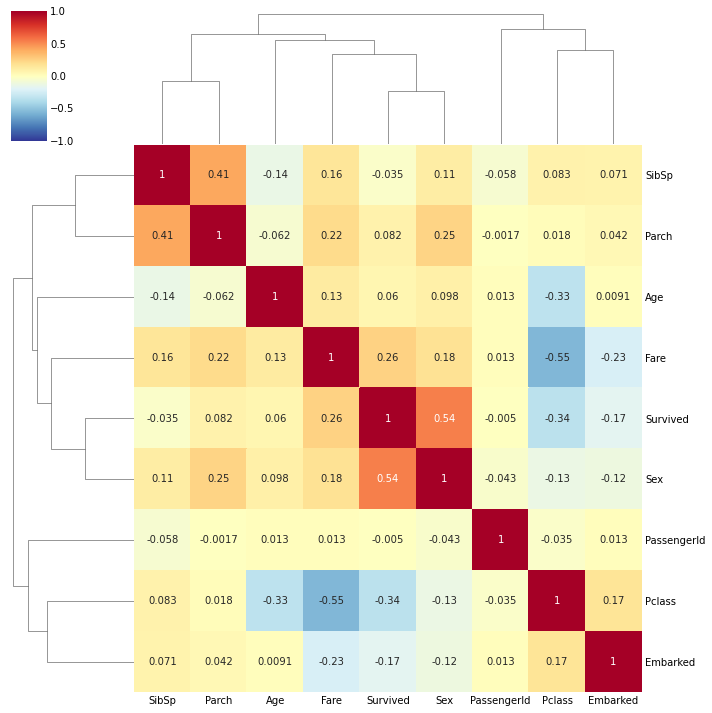

In [53]:
# Show Heatmap using sns library

sns.clustermap(improved_data, 
               annot = True,      # 실제 값 화면에 나타내기
               cmap = 'RdYlBu_r',  # Red, Yellow, Blue 색상으로 표시
               vmin = -1, vmax = 1, #컬러차트 -1 ~ 1 범위로 표시
              )


# 실습4

지난 실습에서는 데이터의 column 간의 correlation 을 확인하여 survived 에 영향을 크게 주는 column 을 확인하였다. 

이 정보를 바탕으로 데이터를 분석하여 어떠한 상황에서 생존률을 예측할 수 있는지를 분석내용과 함께 3가지를 제시하라.

### 주의사항
1. 머신러닝은 사용하지 않는다.
2. 그림, 그래프, 도표로 표시한다.
3. 해당 과제 내용을 바탕으로 Week 3 가 진행된다.
4. 타당한 수치로 생존율과 연관이 있어야 한다. 45%

### 예시
아래의 예시들은 나이와 생존의 관계이다.

16세 이하의 생존율은 55% 로 다른 나이에 비해 생존율이 높다.

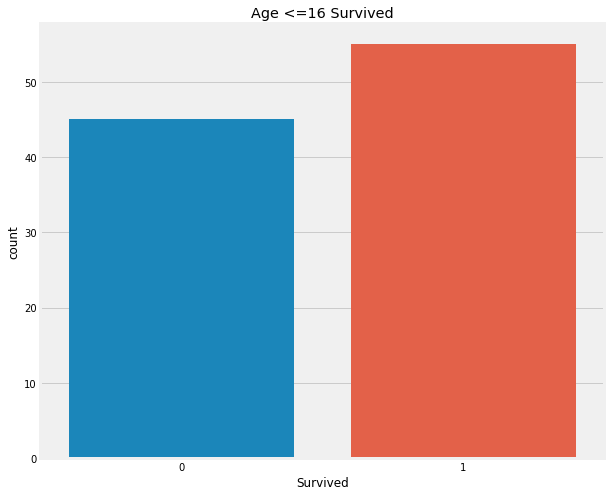

16세 이하의 생존율 55.00000000000001%


In [54]:
# 16세 이하의 생존률
dropped_data[(data['Age'] <= 16) & (data['Survived'] == 1)]['Survived'].count() / dropped_data[data['Age'] <= 16]['Survived'].count()
data1 = dropped_data[(data['Age'] <= 16)]

f,ax=plt.subplots(1, 1,figsize=(9,8))
sns.countplot('Survived',data=data1,ax=ax)
ax.set_title('Age <=16 Survived')
plt.show()
print(f"16세 이하의 생존율 {dropped_data[(data['Age'] <= 16) & (data['Survived'] == 1)]['Survived'].count() / dropped_data[data['Age'] <= 16]['Survived'].count() * 100}%")

In [55]:
# 16 ~ 32세의 생존률
dropped_data[(data['Age'] > 16) & (data['Age'] <= 32) & (data['Survived'] == 1)]['Survived'].count() / dropped_data[(data['Age'] > 16) & (data['Age'] <= 32)]['Survived'].count()


0.3699421965317919

In [56]:
# 32 ~ 48세의 생존률
dropped_data[(data['Age'] > 32) & (data['Age'] <= 48) & (data['Survived'] == 1)]['Survived'].count() / dropped_data[(data['Age'] > 16) & (data['Age'] <= 32)]['Survived'].count()



0.21965317919075145

In [57]:
# 48 ~ 64세의 생존률
dropped_data[(data['Age'] > 48) & (data['Age'] <= 64) & (data['Survived'] == 1)]['Survived'].count() / dropped_data[(data['Age'] > 48) & (data['Age'] <= 64)]['Survived'].count()



0.43478260869565216

In [58]:
# 64세 이상의 생존률
dropped_data[(data['Age'] > 64) & (data['Survived'] == 1)]['Survived'].count() / dropped_data[(data['Age'] > 64)]['Survived'].count() 





0.09090909090909091

# 분석 1

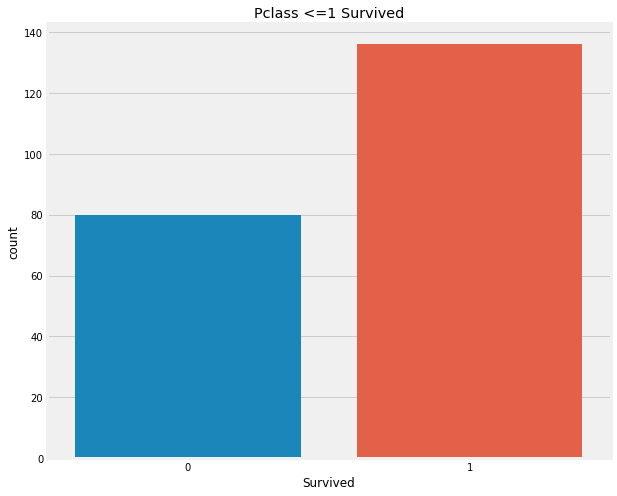

1등급 티켓 소유 승객의 생존율 62.96296296296296%


In [69]:
# TODO


# Ticketclass가 1등급인 경우
dropped_data[(data['Pclass'] <= 1 ) & (data['Survived'] == 1)]['Survived'].count() / dropped_data[data['Pclass'] <= 1]['Survived'].count()
data1 = dropped_data[(data['Pclass'] <= 1)]

f,ax=plt.subplots(1, 1,figsize=(9,8))
sns.countplot('Survived',data=data1,ax=ax)
ax.set_title('Pclass <=1 Survived')
plt.show()
print(f"1등급 티켓 소유 승객의 생존율 {dropped_data[(data['Pclass'] <= 1) & (data['Survived'] == 1)]['Survived'].count() / dropped_data[data['Pclass'] <= 1]['Survived'].count() * 100}%")

# 분석 2

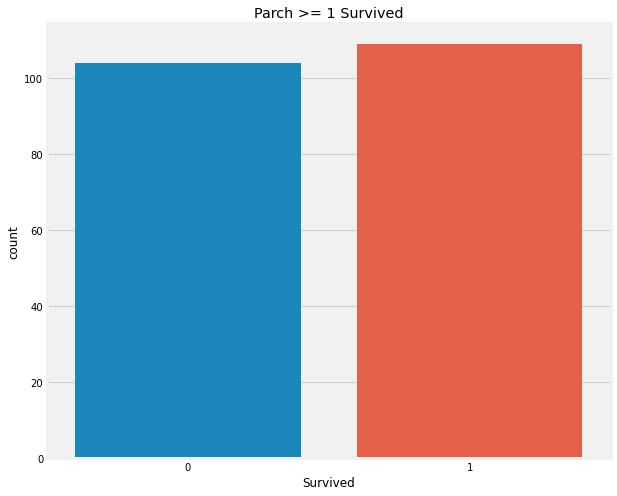

# of parents / children이 1 이상인 승객의 생존율 51.173708920187785%


In [70]:
# TODO


# Ticketclass가 1등급인 경우
dropped_data[(data['Parch'] >= 1 ) & (data['Survived'] == 1)]['Survived'].count() / dropped_data[data['Parch'] >= 1]['Survived'].count()
data1 = dropped_data[(data['Parch'] >= 1)]

f,ax=plt.subplots(1, 1,figsize=(9,8))
sns.countplot('Survived',data=data1,ax=ax)
ax.set_title('Parch >= 1 Survived')
plt.show()
print(f"# of parents / children이 1 이상인 승객의 생존율 {dropped_data[(data['Parch'] >= 1) & (data['Survived'] == 1)]['Survived'].count() / dropped_data[data['Parch'] >= 1]['Survived'].count() * 100}%")

# 분석 3

In [ ]:
# TODO

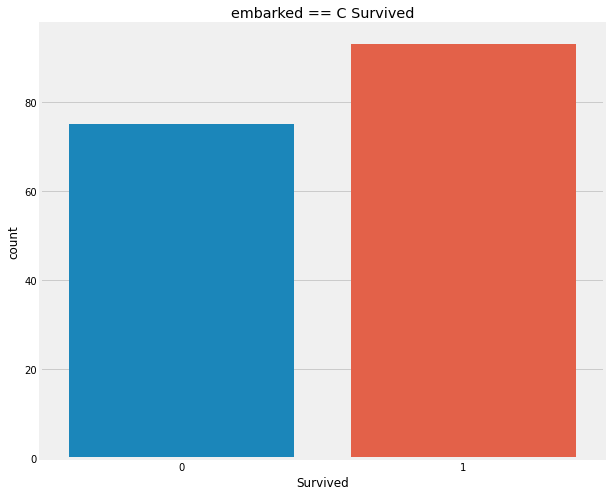

Cherbourg에서 탑승한 승객의 생존율 55.35714285714286%


In [76]:
# TODO


# Ticketclass가 1등급인 경우
dropped_data[(data['Embarked'] == 'C' ) & (data['Survived'] == 1)]['Survived'].count() / dropped_data[data['Embarked'] == 'C']['Survived'].count()
data1 = dropped_data[(data['Embarked'] == 'C')]

f,ax=plt.subplots(1, 1,figsize=(9,8))
sns.countplot('Survived',data=data1,ax=ax)
ax.set_title('embarked == C Survived')
plt.show()
print(f"Cherbourg에서 탑승한 승객의 생존율 {dropped_data[(data['Embarked'] =='C' ) & (data['Survived'] == 1)]['Survived'].count() / dropped_data[data['Embarked'] == 'C']['Survived'].count() * 100}%")